In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pickle as pkl

Using TensorFlow backend.


## Create Dataset 

In [2]:
stock_dataset = pd.read_csv("AMD.csv", index_col = "Date", parse_dates=True)

In [3]:
stock_dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300
2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300
2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600
2009-05-28,4.75,4.84,4.54,4.70,4.70,18383900
2009-05-29,4.71,4.78,4.38,4.54,4.54,24539700


In [4]:
stock_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,6.434732,6.563961,6.300887,6.433221,6.433221,3.107491e+07
std,3.872391,3.954999,3.792914,3.879124,3.879124,2.791149e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.480000,3.550000,3.405000,3.465000,3.465000,1.421670e+07
50%,5.580000,5.720000,5.450000,5.600000,5.600000,2.228020e+07
75%,8.555000,8.710000,8.375000,8.565000,8.565000,3.776905e+07
max,25.510000,27.299999,24.629999,25.260000,25.260000,3.250584e+08


In [5]:
stock_dataset.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

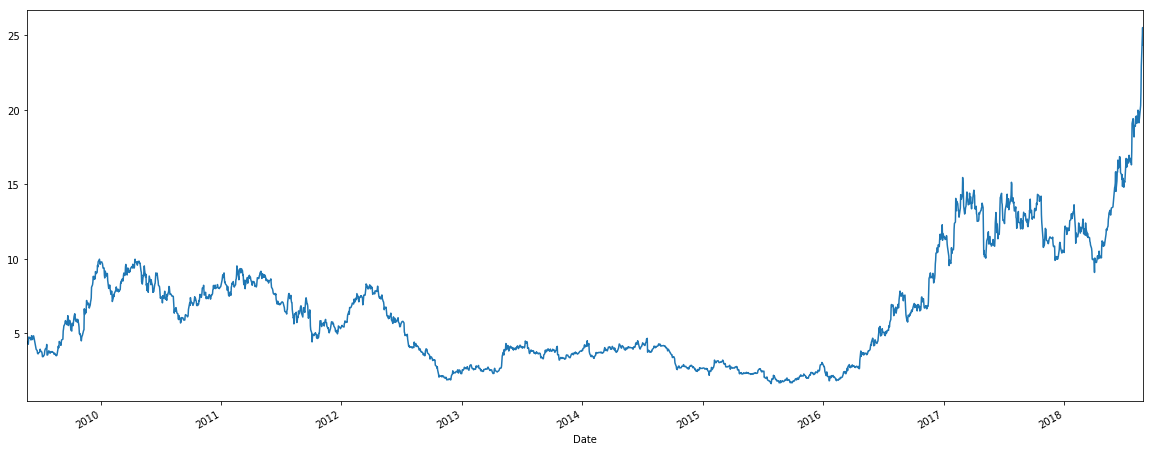

In [6]:
stock_dataset['Open'].plot(figsize = (20,8))

In [7]:
open_dataset = stock_dataset["Open"]
mean = open_dataset.mean()
std = open_dataset.std()
mean,std

(6.4347323361884365, 3.872390825060707)

In [8]:
open_dataset = open_dataset.apply(lambda x : (x - mean) / std)
open_dataset.head()

Date
2009-05-22   -0.517699
2009-05-26   -0.561599
2009-05-27   -0.481545
2009-05-28   -0.435063
2009-05-29   -0.445392
Name: Open, dtype: float64

In [9]:
open_dataset.shape

(2335,)

In [10]:
features = []
y = []

window_size = 50
predicted_size = 1

for i in range(open_dataset.shape[0] - window_size - predicted_size):
    features.append(open_dataset[i:i+window_size])
    y.append(open_dataset[i+ window_size])
features, y = np.array(features), np.array(y)
features = np.reshape(features, (features.shape[0], features.shape[1], 1))

## Train test split  (20%)

In [11]:
split_index = int(features.shape[0]*(1-0.2))
X_train, X_test = features[0:split_index],features[split_index:]
y_train,y_test = y[0:split_index],y[split_index:]

X_train.shape, y_train.shape

((1827, 50, 1), (1827,))

## Create Neural Network

In [14]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (window_size, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fit model

In [15]:
model.fit(
    features, 
    y, 
    epochs = 50, 
    batch_size = 32
)

Epoch 1/50
2284/2284 [==============================] - 18s 8ms/step - loss: 0.1279
Epoch 2/50
2284/2284 [==============================] - 15s 6ms/step - loss: 0.0447
Epoch 3/50
2284/2284 [==============================] - 17s 7ms/step - loss: 0.0416
Epoch 4/50
2284/2284 [==============================] - 16s 7ms/step - loss: 0.0368
Epoch 5/50
2284/2284 [==============================] - 15s 7ms/step - loss: 0.0322
Epoch 6/50
2284/2284 [==============================] - 16s 7ms/step - loss: 0.0312
Epoch 7/50
2284/2284 [==============================] - 14s 6ms/step - loss: 0.0291
Epoch 8/50
2284/2284 [==============================] - 15s 7ms/step - loss: 0.0305
Epoch 9/50
2284/2284 [==============================] - 16s 7ms/step - loss: 0.0290
Epoch 10/50
2284/2284 [==============================] - 16s 7ms/step - loss: 0.0251
Epoch 11/50
2284/2284 [==============================] - 15s 6ms/step - loss: 0.0259
Epoch 12/50
2284/2284 [==============================] - 14s 6ms/step - lo

In [16]:
predict_stcok = model.predict(X_test)

In [17]:
with open("model.pkl","wb") as f:
    pkl.dump(model,f)

In [2]:
plt.figure(figsize = (20,4))
plt.plot(predict_stcok,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [1]:
from scipy.stats import pearsonr
print(pearsonr(predict_stcok,y_test))


NameError: name 'predict_stcok' is not defined